<a href="https://colab.research.google.com/github/pmcleod10/Data_Sci/blob/main/McLeod_Stats_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STA 2023 Final Project
## Directions:

1) Replace the image dataset in the google slides with your own data.

2) Comment and explain all code to the best of your ability.

3) Run your model 3 times. 

4) Report best, worst, and average of the three runs. 




Use any and all resources available to you.

Comment and explain the code.

Answer the questions to the best of your abilities.

If you have any questions, txt 561-479-8123

Save this notebook to your GitHub and submit the link on Canvas


In [1]:
%%capture
!pip install wandb
!apt-get install poppler-utils
!pip install pdf2image
!pip install flashtorch                            # importing all of the necessary codes
import requests
from pdf2image import convert_from_path
import matplotlib.pyplot as plt
import numpy as np
import torch
import requests
from torchvision import *
from torchvision.models import *
from flashtorch.utils import apply_transforms
import wandb as wb

In [2]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

def plot(x):
    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(5, 5)
    plt.show()
    
def get_google_slide(url):
    url_head = "https://docs.google.com/presentation/d/"
    url_body = url.split('/')[5]
    page_id = url.split('.')[-1]
    return url_head + url_body + "/export/pdf?id=" + url_body + "&pageid=" + page_id     # importing the url for the google slides in order to get the images into colab

def get_slides(url):
    url = get_google_slide(url)
    r = requests.get(url, allow_redirects=True)
    open('file.pdf', 'wb').write(r.content)
    images = convert_from_path('file.pdf', 500)
    return images

def load(image):

    return apply_transforms(image).clone().detach().requires_grad_(True).to(device)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [3]:
labels = {int(key):value for (key, value) in requests.get('https://s3.amazonaws.com/mlpipes/pytorch-quick-start/labels.json').json().items()}

model = alexnet(weights='DEFAULT').to(device)       # all labels that the code will use to distinguish between the images
model.eval();

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

In [5]:
url = "https://docs.google.com/presentation/d/1THIhzkw8xoJc8qurThWvTMvbLmFfGEkP8vsw-_ZeL0E/edit#slide=id.g1af89321871_0_242" # google slides url

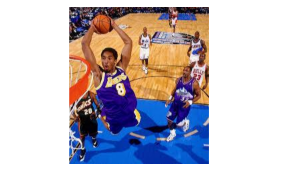

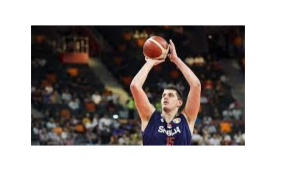

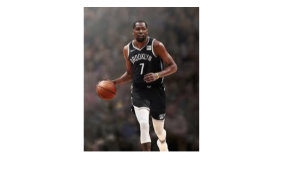

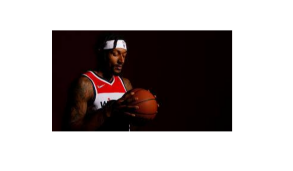

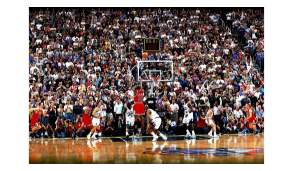

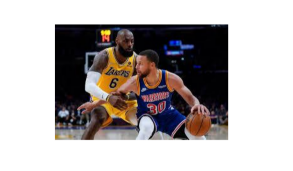

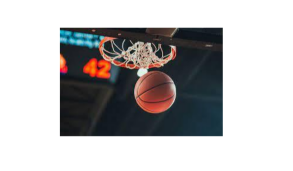

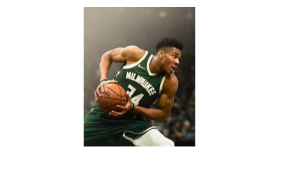

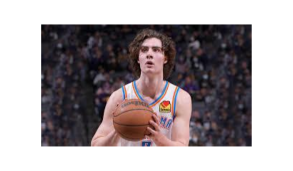

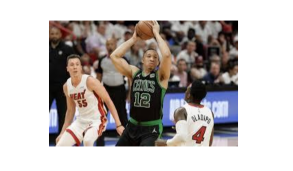

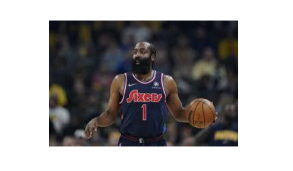

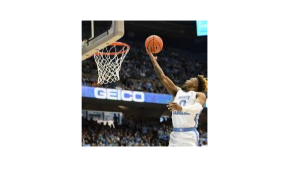

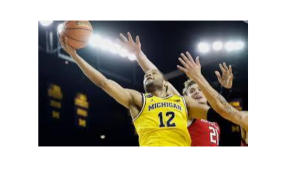

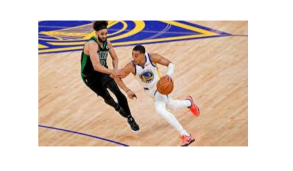

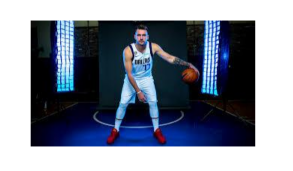

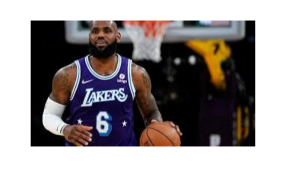

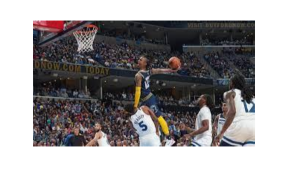

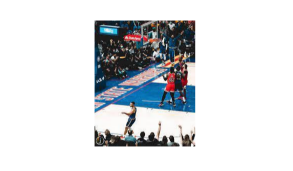

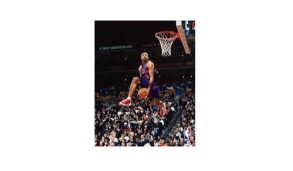

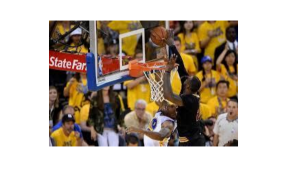

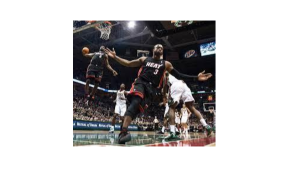

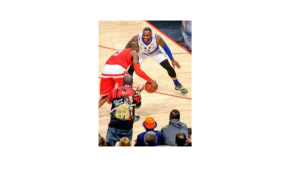

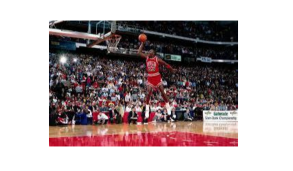

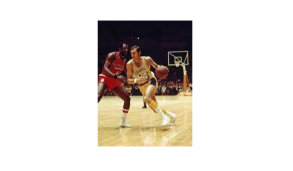

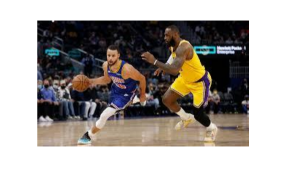

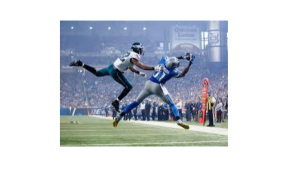

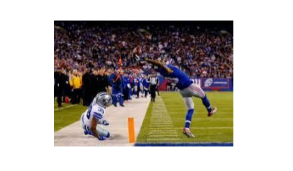

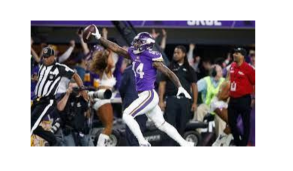

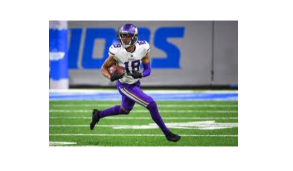

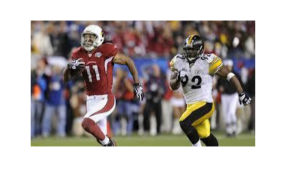

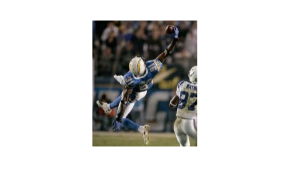

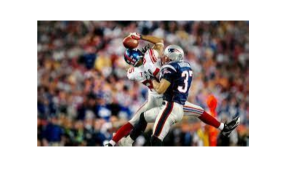

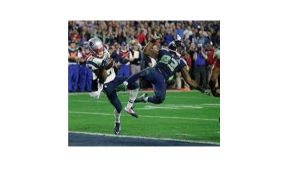

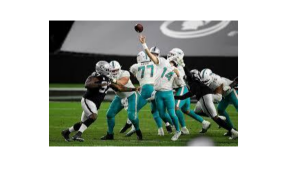

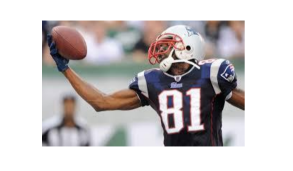

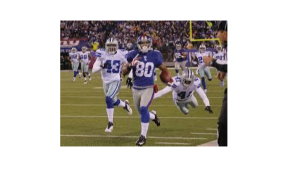

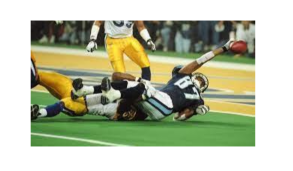

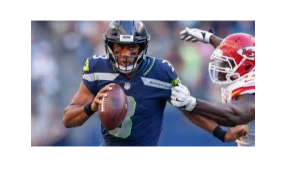

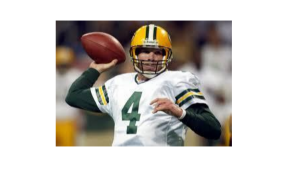

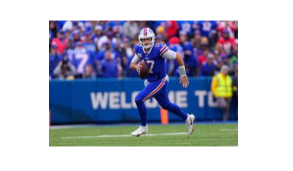

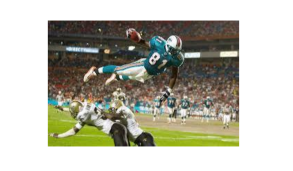

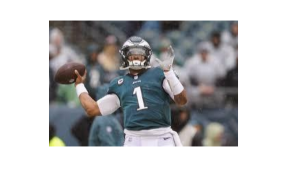

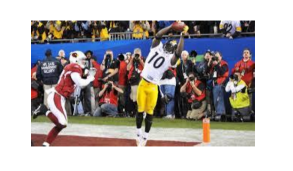

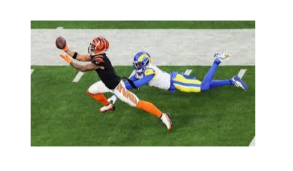

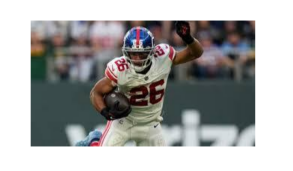

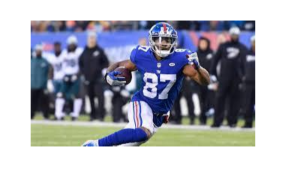

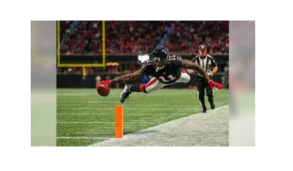

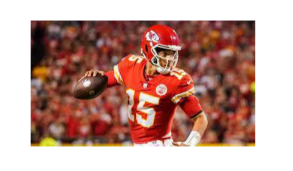

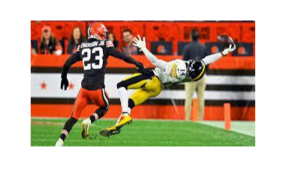

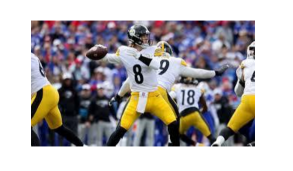

In [6]:
images = []

for image in get_slides(url):       # imported images from the google slides that the code will label

    plot(image)

    images.append(load(image))

images = torch.vstack(images)

In [19]:
images.shape

torch.Size([50, 3, 224, 224])

In [20]:
model(images)

tensor([[-4.0733, -0.0964,  1.7701,  ..., -2.5659,  2.4052,  1.4631],
        [-1.9433,  0.8013, -0.9886,  ..., -0.8539, -0.5119,  1.3702],
        [-2.4037, -1.7898, -2.5421,  ..., -2.1694,  0.2770,  3.0537],
        ...,
        [-7.2475,  0.9760, -4.5921,  ...,  2.2493,  2.3574,  0.6601],
        [-5.9268,  3.7058, -4.4911,  ..., -2.4764,  1.9169, -1.4166],
        [-6.5102, -2.5190, -1.2262,  ..., -4.6024,  3.1613, -0.6745]],
       device='cuda:0', grad_fn=<AddmmBackward0>)

In [21]:
y = model(images)                                    # making the label 'y' have a definition

In [22]:
y.shape

torch.Size([50, 1000])

In [23]:
guesses = torch.argmax(y, 1).cpu().numpy()

In [24]:
for i in list(guesses):                   # the programs guesses for all of the picture
    print(labels[i])

volleyball
horizontal bar, high bar
horizontal bar, high bar
horizontal bar, high bar
horizontal bar, high bar
television, television system
wallet, billfold, notecase, pocketbook
television, television system
parallel bars, bars
basketball
balance beam, beam
web site, website, internet site, site
balance beam, beam
puck, hockey puck
television, television system
ping-pong ball
ski
monitor
kimono
ski
dogsled, dog sled, dog sleigh
hamper
stage
hamper
volleyball
mountain bike, all-terrain bike, off-roader
football helmet
television, television system
television, television system
football helmet
padlock
balance beam, beam
croquet ball
swimming trunks, bathing trunks
football helmet
scoreboard
stretcher
power drill
bobsled, bobsleigh, bob
ballplayer, baseball player
hair slide
torch
television, television system
croquet ball
balance beam, beam
football helmet
parachute, chute
football helmet
football helmet
ski


In [25]:
Y = np.zeros(50,)
Y[25:] = 1

In [26]:
Y                               # testing out the array of Y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [27]:
X = y.detach().cpu().numpy() 

In [28]:
X.shape

(50, 1000)

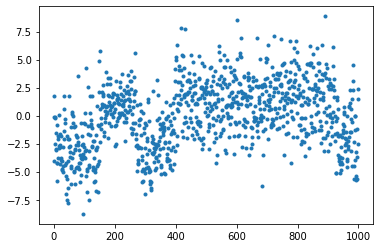

In [29]:
plt.plot(X[0],'.')                            # the plot for all of the pictures

In [30]:
X[0]

array([-4.0732856e+00, -9.6404493e-02,  1.7700512e+00, -7.8316152e-02,
       -2.5666926e+00, -2.5554579e-01, -3.0639803e+00, -1.5239815e+00,
       -3.0165513e+00, -5.8368440e+00, -4.2611356e+00, -4.2340689e+00,
       -8.6486059e-01, -2.0895731e+00, -3.7786932e+00, -1.8467910e+00,
        8.5922636e-02, -2.6863055e+00, -2.9196398e+00, -4.3235703e+00,
       -2.7738886e+00, -1.6020690e+00, -2.5891047e+00, -1.8001027e+00,
       -3.7402675e+00, -3.9920661e+00, -4.8397427e+00, -4.7259169e+00,
       -4.0146036e+00, -4.5006475e+00, -2.7828453e+00, -5.0291586e+00,
       -1.4047749e+00,  1.7822678e+00, -2.0865304e+00,  5.8293724e-01,
       -6.8484294e-01, -4.4040713e+00, -3.2522622e-01, -4.2347307e+00,
       -6.9753423e+00, -5.3937039e+00, -7.5245519e+00, -1.7760416e+00,
       -5.6436782e+00, -2.0869231e+00, -6.4968710e+00, -7.7701931e+00,
       -4.0080070e+00, -2.8022285e+00, -2.0589809e+00,  1.7234063e+00,
       -2.6886966e+00, -3.2732437e+00, -3.6597848e+00, -6.0710020e+00,
      

In [31]:
np.argmax(X[0])

890

In [34]:
labels[560]                              

'football helmet'

In [35]:
top_ten = np.argsort(X[0])[::-1][0:10]

In [36]:
for i in top_ten:                # the top 10 different labels the the program gave the images
    print(labels[i])

volleyball
horizontal bar, high bar
balance beam, beam
basketball
ping-pong ball
mortarboard
kimono
punching bag, punch bag, punching ball, punchball
ski
sarong


In [37]:
labels                             # all avaliable labels

{0: 'tench, Tinca tinca',
 1: 'goldfish, Carassius auratus',
 2: 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
 3: 'tiger shark, Galeocerdo cuvieri',
 4: 'hammerhead, hammerhead shark',
 5: 'electric ray, crampfish, numbfish, torpedo',
 6: 'stingray',
 7: 'cock',
 8: 'hen',
 9: 'ostrich, Struthio camelus',
 10: 'brambling, Fringilla montifringilla',
 11: 'goldfinch, Carduelis carduelis',
 12: 'house finch, linnet, Carpodacus mexicanus',
 13: 'junco, snowbird',
 14: 'indigo bunting, indigo finch, indigo bird, Passerina cyanea',
 15: 'robin, American robin, Turdus migratorius',
 16: 'bulbul',
 17: 'jay',
 18: 'magpie',
 19: 'chickadee',
 20: 'water ouzel, dipper',
 21: 'kite',
 22: 'bald eagle, American eagle, Haliaeetus leucocephalus',
 23: 'vulture',
 24: 'great grey owl, great gray owl, Strix nebulosa',
 25: 'European fire salamander, Salamandra salamandra',
 26: 'common newt, Triturus vulgaris',
 27: 'eft',
 28: 'spotted salamander, Ambystoma 

(array([  5.,  27., 108., 149., 208., 217., 183.,  74.,  24.,   5.]),
 array([-8.7722    , -7.007876  , -5.2435527 , -3.479229  , -1.7149055 ,
         0.04941797,  1.8137414 ,  3.578065  ,  5.3423886 ,  7.106712  ,
         8.871036  ], dtype=float32),
 <a list of 10 Patch objects>)

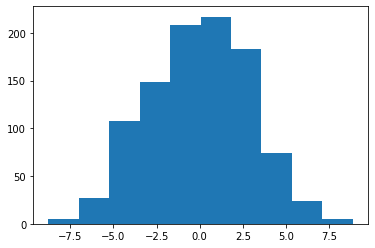

In [38]:
plt.hist(X[0])                                              # histogram of the top 10 labels

In [39]:
X = GPU_data(X)
Y = GPU_data(Y)

In [40]:
def softmax(x):
    s1 = torch.exp(x - torch.max(x,1)[0][:,None])
    s = s1 / s1.sum(1)[:,None]
    return s

In [41]:
def cross_entropy(outputs, labels):            
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]  

In [42]:
def randn_trunc(s): #Truncated Normal Random Numbers
    mu = 0 
    sigma = 0.1
    R = stats.truncnorm((-2*sigma - mu) / sigma, (2*sigma - mu) / sigma, loc=mu, scale=sigma)
    return R.rvs(s)

In [43]:
def Truncated_Normal(size):

    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2)
    u2 = torch.rand(size)
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2)

    return z

In [44]:
def acc(out,y):
    with torch.no_grad():
        return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0]

In [45]:
X.shape

torch.Size([50, 1000])

In [46]:
def get_batch(mode):
    b = c.b
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [47]:
def model(x,w):

    return x@w[0]

In [48]:
def make_plots():
    
    acc_train = acc(model(x,w),y)
    
    # xt,yt = get_batch('test')

    # acc_test = acc(model(xt,w),yt)

    wb.log({"acc_train": acc_train})

In [51]:
wb.init(project="Linear_Model_Photo_1");
c = wb.config

c.h = 0.001
c.b = 32
c.epochs = 100000

w = [GPU(Truncated_Normal((1000,2)))]

optimizer = torch.optim.Adam(w, lr=c.h)  

for i in range(c.epochs):

    x,y = get_batch('train')

    loss = cross_entropy(softmax(model(x,w)),y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
   
    wb.log({"loss": loss})

    make_plots()


acc_train,▂▃▄▁▄▄▄▂▄▅▂█▇█▇▇█▆█▇▇▇▇▇██████▇▇█▇█▇██▆█
loss,▇▆▅█▅▅▅▇▅▄▇▁▂▁▂▂▁▃▁▂▂▂▂▂▁▁▁▁▁▁▂▂▁▂▁▂▁▁▃▁
acc_train,0.90625
loss,0.40701


<ipython-input-7-4608b466ff03>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))


https://tensorspace.org/

Best- Run2 (0.9063)
Worst- Run1 (0.7813)
Average- 0.8542

